## 5. Summarizing and Visualizing Data
Data summarization and visualization are essential for representing complex data sets in a way that is easy to understand. This allows for quick identification of trends, patterns, and outliers in the data. In this notebook you will learn how to calculate summary statistics and how to create charts with your data in Python.

### 5.1. Summary Statistics
#### Basics
Summary statistics (or descriptive statistic) is a representation of the basic characteristics of the data. For example, the mean, median, mode, etc. represent the central tendency of a distribution. Looking at these summary statistics is a very important first step in data analysis. Pandas dataframe provides a convenient way to easily compute these summary statistics.<br><br>
First, let's read the atlas data as in the previous notebook. This data records regional characteristics such as average household income and population composition for census tract regions.

In [1]:
import pyarrow as pya
import pandas as pd
df = pd.read_csv('atlas.csv')
df.head()

,tract,county,state,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,...,kfr_pooled_p100,kfr_white_p25,kfr_white_p75,kfr_white_p100,count_pooled,count_white,count_black,count_asian,count_hisp,count_natam
0,20100,1.0,1.0,11101.0,Montgomery,68638.730,26.171911,0.254428,0.156479,0.009950,...,78921.500,30327.947,50820.145,75126.030,519.0,457.0,42.0,3.0,4.0,6.0
1,20200,1.0,1.0,11101.0,Montgomery,57242.510,24.806705,0.267194,0.146932,0.016337,...,74225.370,42188.812,54239.120,66645.695,530.0,173.0,336.0,1.0,5.0,1.0
2,20300,1.0,1.0,11101.0,Montgomery,75647.730,25.322525,0.164159,0.224413,0.027096,...,76055.360,33670.453,51579.383,71990.970,960.0,774.0,151.0,1.0,21.0,2.0
3,20400,1.0,1.0,11101.0,Montgomery,74852.055,22.965347,0.252744,0.230469,0.015083,...,72586.480,34181.050,52847.863,74330.250,1123.0,1033.0,40.0,6.0,37.0,0.0
4,20500,1.0,1.0,11101.0,Montgomery,96174.766,26.222353,0.375063,0.321154,0.046488,...,81792.414,39540.150,58699.035,80415.090,1867.0,1626.0,137.0,13.0,39.0,8.0


To compute summary statistics for a dataframe, simply apply methods to the data frame. Pandas provides the following methods for computing summary statistics: <b>.mean()</b>, <b>.median()</b>, <b>.mode()</b>, <b>.var()</b>, <b>.std()</b>, <b>.skew()</b>, <b>.kurtosis()</b>, <b>.min()</b>, <b>.max()</b>, <b>.quantile()</b>, <b>.count()</b>, <b>.sum()</b>.

In [14]:
print('Mean:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].mean())

print()
print('Median:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].median())

print()
print('Mode:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].mode().iloc[0])
# Note multiple modes are possible. .iloc[0] chooses the first one

print()
print('Variance:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].var())

print()
print('Standard deviation:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].std())

print()
print('Skewness:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].skew())

print()
print('Kurtosis:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].kurtosis())

print()
print('Minimum:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].min())

print()
print('Maximum:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].max())

print()
print('25% tile:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].quantile(0.25))
# You specify the percentile you want

print()
print('75% tile:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].quantile(0.75))

print()
print('Number of observation:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].count())

print()
print('Total sum:')
print(df[['hhinc_mean2000', 'mean_commutetime2000']].sum())

Mean:
hhinc_mean2000          80337.069573
mean_commutetime2000       26.954643
dtype: float64

Median:
hhinc_mean2000          71722.380000
mean_commutetime2000       26.166533
dtype: float64

Mode:
hhinc_mean2000          178607.610000
mean_commutetime2000        34.812836
Name: 0, dtype: float64

Variance:
hhinc_mean2000          1.184064e+09
mean_commutetime2000    4.910127e+01
dtype: float64

Standard deviation:
hhinc_mean2000          34410.226076
mean_commutetime2000        7.007230
dtype: float64

Skewness:
hhinc_mean2000          1.670208
mean_commutetime2000    0.709387
dtype: float64

Kurtosis:
hhinc_mean2000          4.215869
mean_commutetime2000    0.910199
dtype: float64

Minimum:
hhinc_mean2000          7239.477
mean_commutetime2000       2.500
dtype: float64

Maximum:
hhinc_mean2000          330042.22000
mean_commutetime2000        80.02542
dtype: float64

25% tile:
hhinc_mean2000          57378.600000
mean_commutetime2000       22.042091
Name: 0.25, dtype: float64

75%

In addition, Pandas' <b>.describe()</b> method can be used to compute summary statistics for numerical data in one step. This allows for a quick overview of the entire data set.

In [9]:
df.describe()

,tract,county,state,cz,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc2016,...,kfr_pooled_p100,kfr_white_p25,kfr_white_p75,kfr_white_p100,count_pooled,count_white,count_black,count_asian,count_hisp,count_natam
count,73278.000000,73278.000000,73278.000000,72473.000000,72302.000000,72313.000000,72993.000000,72343.000000,72279.000000,72763.000000,...,71968.000000,67978.000000,67968.000000,6.762700e+04,72451.000000,72451.000000,72451.000000,72451.000000,72451.000000,72451.000000
mean,255250.352507,86.059690,28.187778,21292.812027,80337.069573,26.954643,0.269399,0.237843,0.120907,58898.302434,...,69699.337085,38443.025571,55147.930413,7.484014e+04,997.466136,607.611006,146.358698,33.403100,170.314350,9.345806
std,345989.957739,99.554898,16.313131,11523.672549,34410.226076,7.007230,0.182533,0.168642,0.137761,29641.956585,...,18074.194760,8836.533573,10186.593666,2.430776e+04,503.401273,441.691473,282.491290,79.895551,328.842664,66.300670
min,100.000000,1.000000,1.000000,100.000000,7239.477000,2.500000,0.000000,0.000000,0.000000,3250.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10300.000000,29.000000,13.000000,11600.000000,57378.600000,22.042091,0.130949,0.110759,0.023031,38809.000000,...,60158.968750,32550.748750,49884.606750,6.490102e+04,637.000000,252.000000,6.000000,2.000000,15.000000,0.000000
50%,44804.500000,63.000000,28.000000,19700.000000,71722.380000,26.166533,0.218568,0.186986,0.067073,52333.000000,...,70335.160000,37313.070500,55094.246000,7.431231e+04,940.000000,555.000000,27.000000,9.000000,42.000000,2.000000
75%,458875.750000,109.000000,42.000000,32000.000000,94675.837500,31.051470,0.370886,0.325451,0.168931,71935.000000,...,79232.422500,43206.462000,60475.069500,8.335748e+04,1301.000000,886.000000,135.000000,28.000000,148.000000,5.000000
max,989200.000000,840.000000,72.000000,39400.000000,330042.220000,80.025420,1.000000,1.000000,1.000000,250001.000000,...,980579.000000,244492.170000,849669.200000,1.047303e+06,8441.000000,4202.000000,3041.000000,1816.000000,3966.000000,3605.000000


By using the <b>.agg()</b> method instead of the <b>.describe()</b> method, you can specify the desired summary statistics. You pass the list of statistics to the agg method.

In [13]:
df[['hhinc_mean2000', 'mean_commutetime2000']].agg(["min", "max", "mean", "median", "skew", "kurtosis"])

,hhinc_mean2000,mean_commutetime2000
min,7239.477000,2.500000
max,330042.220000,80.025420
mean,80337.069573,26.954643
median,71722.380000,26.166533
skew,1.670208,0.709387
kurtosis,4.215869,0.910199


Moreover, you can define your own statistics and compute them for dataframes by using the agg method. In the following example, we define `minmaxrange` as my custom statistics which simply calculete the difference between the minimum and maximum value. In functions that compute custom statistics, the argument is a Pandas series.

In [27]:
def minmaxrange(series):
    return series.max() - series.min()

Once you define the custom statistics function, you can simply pass it to the agg function in the same way for the build-in statistics.

In [30]:
print('Difference between minimum and maximum')
df[['hhinc_mean2000', 'mean_commutetime2000']].agg(minmaxrange)

Difference between minimum and maximum


hhinc_mean2000          322802.74300
mean_commutetime2000        77.52542
dtype: float64

In addition to statistics for a single series, you can also compute correlation coefficients for a dataframe. Specifically, the <b>.corr()</b> method returns the correlation coefficient matrix for a data frame.

In [31]:
df[['hhinc_mean2000', 'poor_share2000', 'share_white2000', 'emp2000']].corr()

,hhinc_mean2000,poor_share2000,share_white2000,emp2000
hhinc_mean2000,1.000000,-0.633426,0.310096,0.463838
poor_share2000,-0.633426,1.000000,-0.595400,-0.599604
share_white2000,0.310096,-0.595400,1.000000,0.388633
emp2000,0.463838,-0.599604,0.388633,1.000000


#### Summary Statistics by Group
As briefly explained in the previous notebook, the <b>groupby</b> method can be used to aggregate data by category. Basically, the method of calculating summary statistics described above can be applied to groups. In the following examples, the average value for each state is calculated.

In [38]:
# For convenience, first I merge the state name
df = pd.read_csv('atlas.csv')
df_state = pd.read_csv('state_code.csv')
df = pd.merge(df, df_state, on='state')

print(df.groupby(by='state_name')[['hhinc_mean2000', 'gsmn_math_g3_2013']].mean())

                      hhinc_mean2000  gsmn_math_g3_2013
state_name                                             
Alabama                 64750.993631           2.554733
Alaska                  87812.010548           2.937207
Arizona                 78299.718581           3.276292
Arkansas                61111.002231           3.140837
California              91564.763606           2.591614
Colorado                91111.426365           3.750258
Connecticut            103025.007473           3.355187
Delaware                85264.915720           3.420846
District of Columbia    81750.584983           2.247888
Florida                 76929.763720           3.340165
Georgia                 78949.903366           3.072341
Hawaii                  91814.657702           3.533221
Idaho                   68537.235252           3.164477
Illinois                85843.420688           2.864989
Indiana                 73722.781815           3.858877
Iowa                    69696.478503           3

You can also apply the <b>agg</b> method to groups. This method is very useful in practice as a way to calculate summary statistics by category.

In [42]:
df.groupby(by='state_name')[['hhinc_mean2000', 'gsmn_math_g3_2013']].agg(["min", "max", "mean", "median"])

hhinc_mean2000                                         \
                                min         max           mean      median   
state_name                                                                   
Alabama                  16355.9270  248320.020   64750.993631  59503.5940   
Alaska                   39774.5400  191674.450   87812.010548  87105.2450   
Arizona                  25338.1700  271309.560   78299.718581  70206.3700   
Arkansas                 25541.2010  174303.310   61111.002231  57506.2770   
California               13837.2290  306017.120   91564.763606  82465.9275   
Colorado                 17257.5920  292500.470   91111.426365  82738.4000   
Connecticut              23767.7320  301135.000  103025.007473  94253.3150   
Delaware                 34819.8500  228572.120   85264.915720  77181.0200   
District of Columbia     27550.4670  256511.160   81750.584983  68433.3680   
Florida                  16991.5920  317999.280   76929.763720  68848.5300   
Georgia                  17824.6880  259039.030   78949.903366  70199.5950   
Hawaii                    7239.4770  217891.610   91814.657702  88787.6000   
Idaho                    37834.8870  144769.920   68537.235252  63796.2900   
Illinois                 15763.6920  306197.380   85843.420688  77103.9350   
Indiana                  18153.9550  227897.920   73722.781815  69786.3395   
Iowa                     24424.3320  156235.270   69696.478503  65467.8300   
Kansas                   27526.4080  248195.380   75823.801637  65749.3750   
Kentucky                 17904.0330  204697.440   65182.851748  59501.3360   
Louisiana                12484.4040  238089.000   62839.730107  57894.3900   
Maine                    25370.3260  149204.120   66590.388436  63554.2930   
Maryland                  7239.4770  303266.060   96507.063243  90659.3850   
Massachusetts            23344.9410  262415.280   93169.267628  87379.6430   
Michigan                  7239.4770  270441.780   82150.972756  75574.8100   
Minnesota                18601.2200  249785.340   84452.439952  76750.7400   
Mississippi              23908.3730  188611.800   60275.304219  56204.6065   
Missouri                 14424.9280  248241.480   70416.923294  62739.0325   
Montana                  24821.4380  169297.620   60747.058528  57497.8200   
Nebraska                 10682.6430  217461.280   74492.758166  64281.3870   
Nevada                   26642.5430  266364.030   87529.849874  84637.8550   
New Hampshire            31517.4590  184603.270   88268.100031  84129.0350   
New Jersey                7239.4770  306123.700  102040.771874  93235.4550   
New Mexico               24940.9900  171792.700   66101.672038  59774.4275   
New York                  7239.4770  330042.220   84180.427899  75771.2100   
North Carolina            7239.4770  248457.720   75374.115372  68727.4400   
North Dakota             29663.1700  131114.360   62521.401439  60498.3400   
Ohio                     12895.3180  247020.860   74294.758930  69539.1100   
Oklahoma                  8109.6064  243739.690   64083.262945  57583.8630   
Oregon                   20224.5700  200169.390   76672.377906  71003.6500   
Pennsylvania              9623.2070  272498.100   75287.147553  67659.5525   
Puerto Rico                     NaN         NaN            NaN         NaN   
Rhode Island             23136.3320  199425.970   77951.103876  74852.9600   
South Carolina           24020.7270  179845.310   69501.644087  64426.7500   
South Dakota             30398.8420  146747.940   64203.946708  60624.3480   
Tennessee                17679.1640  247986.360   69751.606840  62872.1950   
Texas                     7239.4770  287579.200   77953.663702  68266.3700   
Utah                     28848.6300  215576.200   84217.139223  79440.4900   
Vermont                  40473.0660  129305.520   73401.436344  71166.7700   
Virginia                 15121.4740  312414.530   90651.703480  81157.4850   
Washington               23821.4770  235924

You can combine the <b>agg</b> method and an user-defined statistics as well.

In [40]:
print('Difference between minimum and maximum')
df.groupby(by='state_name')[['hhinc_mean2000', 'gsmn_math_g3_2013']].agg(minmaxrange)

Difference between minimum and maximum


,hhinc_mean2000,gsmn_math_g3_2013
state_name,,
Alabama,231964.0930,4.965068
Alaska,151899.9100,5.310921
Arizona,245971.3900,5.770835
Arkansas,148762.1090,4.987218
California,292179.8910,6.232298
Colorado,275242.8780,4.106408
Connecticut,277367.2680,4.532716
Delaware,193752.2700,1.572859
District of Columbia,228960.6930,0.000000


### 5.2. Data Visualization
Data visualization is a very important process in data analysis, helping the analyst to make inferences and to display the results of the analysis.
#### Basics of Matplotlib
Matplotlib is the most commonly used data visualization library for Python. To use Matplotlib, you must first import matplotlib.pyplot (assuming Matplotlib is already installed).

In [4]:
import matplotlib.pyplot as plt

Let's draw a line graph as a simple example. First, prepare the values of the graph to be drawn. The <b>plt.plot()</b> method will create a chart for supplied data points. The <b>plt.show()</b> function will show the created chart.

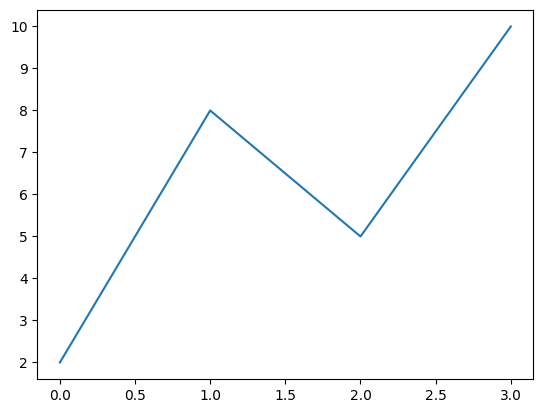

In [4]:
data = [2, 8, 5, 10] # Data to be plotted
plt.plot(data)
plt.show()

As in the above chart, if only the y-value of the data is given, the x-value is the index of the data. You may give both x and y values instead. In that case, you give the x value as the first argument and the y value as the second argument.

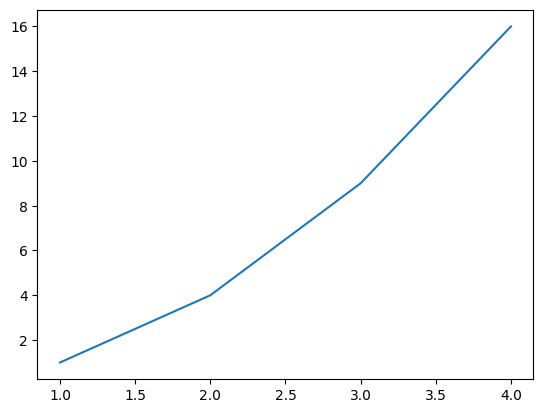

In [3]:
datax = [1, 2, 3, 4]
datay = [1, 4, 9, 16]

plt.plot(datax, datay)
plt.show()

You can also use dataframes instead of lists.

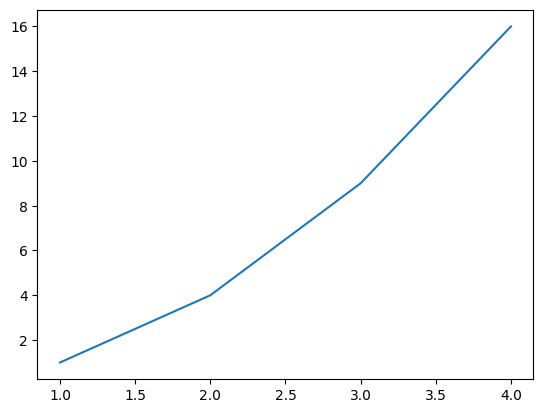

In [4]:
import pandas as pd
df = pd.DataFrame({'datax': [1, 2, 3, 4], 'datay': [1, 4, 9, 16]})

plt.plot(df['datax'], df['datay'])
plt.show()

You can label the titles and axes of your graphs using <b>plt.title(), plt.xlabel(), and plt.ylabel()</b> as follows:

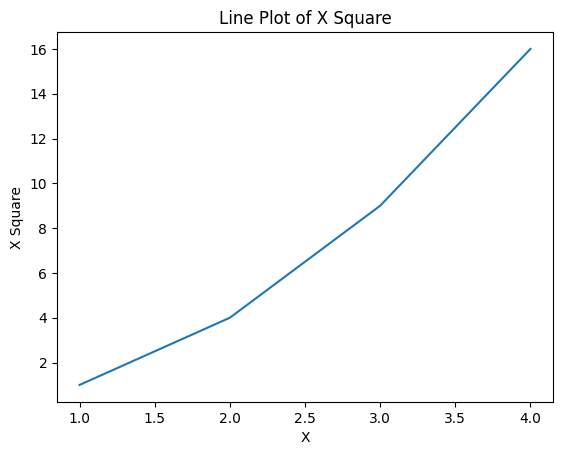

In [5]:
plt.plot(df['datax'], df['datay'])
plt.title('Line Plot of X Square')
plt.xlabel('X')
plt.ylabel('X Square')
plt.show()

While the <b>plt.plot()</b> function produces a line plot, <b>plt.scatter()</b> produces a scatter plot.

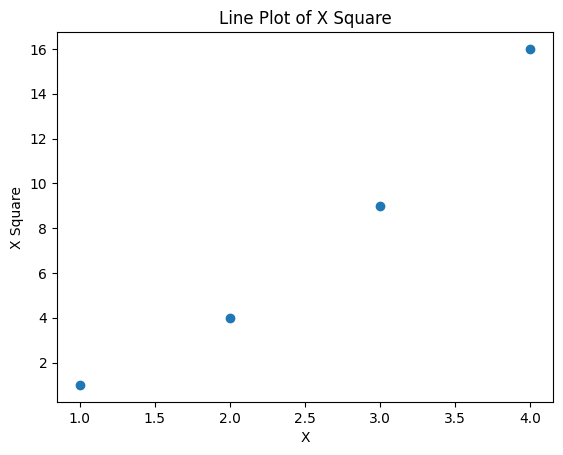

In [7]:
plt.scatter(df['datax'], df['datay'])
plt.title('Line Plot of X Square')
plt.xlabel('X')
plt.ylabel('X Square')
plt.show()

For a practical example, let's use the Atlas data again. We try to examine the relationship between race and income in the regional data. In the following chart, each dot shows a region (Census tract) and x- and y-values show the share of white people and the average income of the region.

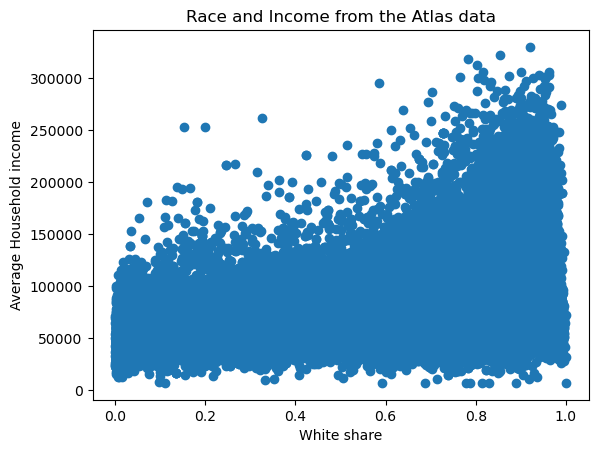

In [11]:
# For convenience, first I merge the state name
df = pd.read_csv('atlas.csv')
df_state = pd.read_csv('state_code.csv')
df = pd.merge(df, df_state, on='state')

plt.scatter(df['share_white2000'], df['hhinc_mean2000'])
plt.title('Race and Income from the Atlas data')
plt.xlabel('White share')
plt.ylabel('Average Household income')
plt.show()

In the figure above, there are too many dots and it may be difficult to visually understand the relationships. Let's use the <b>groupby</b> method to aggregate the data to the county level and draw the graph again. (Note: For simplicity, we aggregate using simpel averages of Census tracts within counties although some sort of weighted average may be more appropriate.)

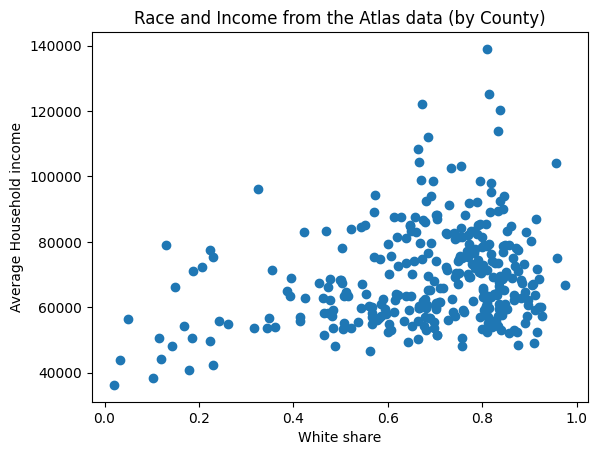

In [22]:
df_bycounty = df[['county', 'share_white2000', 'hhinc_mean2000']].groupby('county').mean()
plt.scatter(df_bycounty['share_white2000'], df_bycounty['hhinc_mean2000'])
plt.title('Race and Income from the Atlas data (by County)')
plt.xlabel('White share')
plt.ylabel('Average Household income')
plt.show()

We see that the average income of the region is positively correlated with the share of the white population. As you can see, even a simple check of a scatter plot like this is already a first step in data analysis.<br><br><br>
Let's try to create other types of graphs using the Atlas data. The following is an example of creating a barplot. <b>plt.bar()</b> produces it. We draw a barplot for average income by state, sorted in descending order.　(Note: Again, For simplicity, we aggregate using simple averages of Census tracts within states although some sort of weighted average may be more appropriate.)

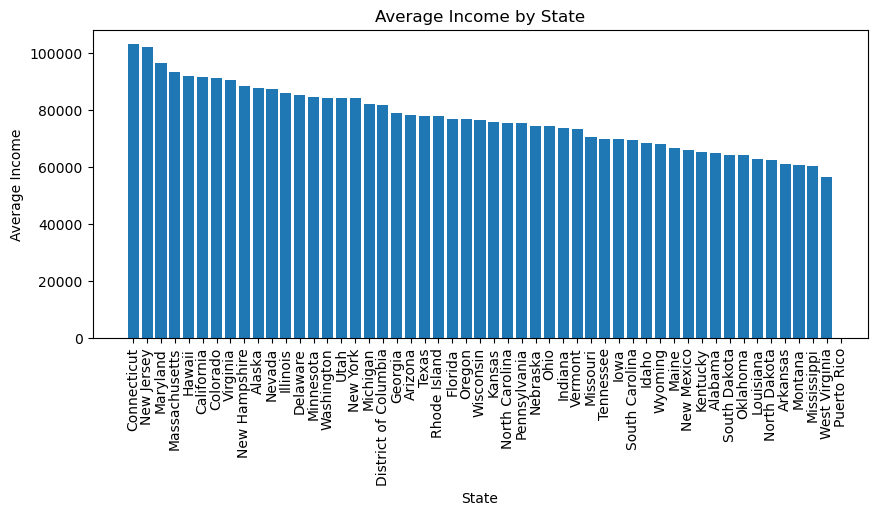

In [17]:
df_bystate = df[['state_name', 'hhinc_mean2000']].groupby('state_name').mean()
df_bystate = df_bystate.sort_values('hhinc_mean2000', ascending=False) # Descending order

plt.figure(figsize =(10, 4)) # Create figure
plt.bar(df_bystate.index, df_bystate['hhinc_mean2000'])
plt.title('Average Income by State')
plt.xlabel('State')
plt.ylabel('Average Income')
plt.xticks(rotation=90) # Make the label vertical
plt.show()

Note that in the example above, we write `plt.figure(figsize =(10, 4))` to specify the size of the figure. The <b>plt.figure()</b> function creates an area to draw a chart (i.e., <i>Figure</i> object). A <i>Figure</i> object must be created when drawing a chart, but you do not necessarily need to write it explicitly because it is automatically executed when plotting functions such as <b>plt.plot</b>, <b>plt.scatter</b>, and <b>plt.bar</b> are executed. If you explicitly run <b>plt.figure()</b>, you can set options about the figure object by filling its arguments.
<br><br><br>

You can also create a stacked bar plot repeating <b>plt.bar()</b>. You need to specify the base level of the item by specifying the <b>bottom</b> argument. See the following example of a stacked barplot showing the composition of whites and other races in each state. Note the <b>plt.legend() function</b> adds legends to the chart.

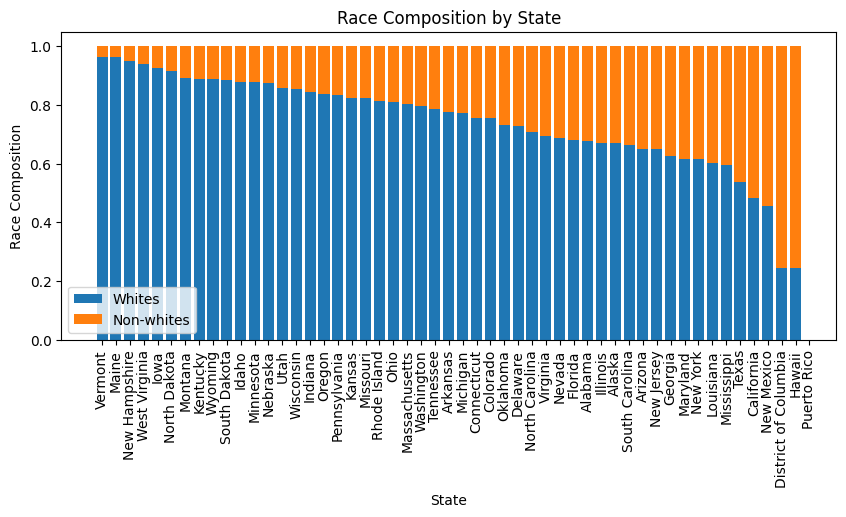

In [33]:
df_bystate = df[['state_name', 'share_white2000']].groupby('state_name').mean()
df_bystate['share_non_white2000'] = 1 - df_bystate['share_white2000'] # share of non-white people
df_bystate = df_bystate.sort_values('share_white2000', ascending=False) # Descending order

plt.figure(figsize =(10, 4)) 
plt.bar(df_bystate.index, df_bystate['share_white2000']) # No need for bottom argument for the first variable.
plt.bar(df_bystate.index, df_bystate['share_non_white2000'], bottom=df_bystate['share_white2000']) # Bottom argument must be specified
plt.title('Race Composition by State')
plt.xlabel('State')
plt.ylabel('Race Composition')
plt.xticks(rotation=90) # Make the label vertical
plt.legend(['Whites', 'Non-whites'])
plt.show()

Next, let's draw a histogram using the <b>plt.hist()</b>.

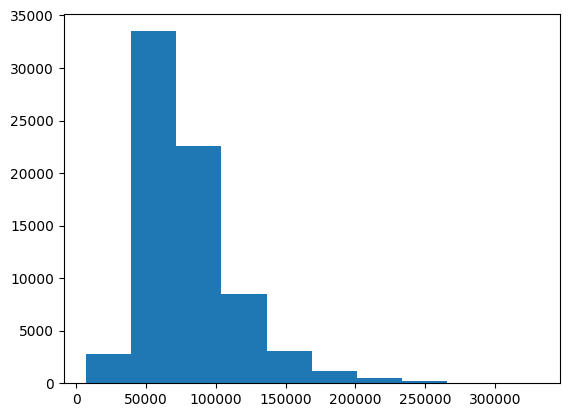

In [35]:
plt.hist(df['hhinc_mean2000'])
plt.show()

By default the number of bins is 10, but you may specify it with the <b>bins</b> argument.

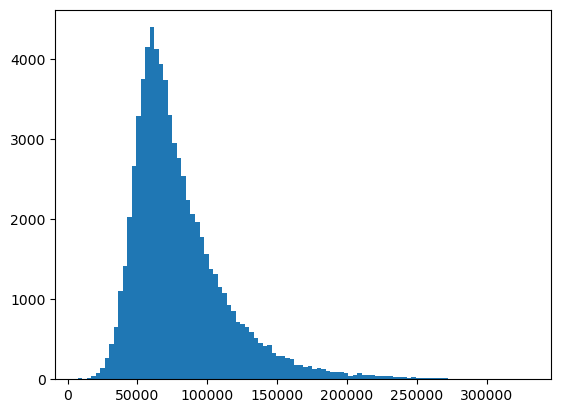

In [21]:
plt.hist(df['hhinc_mean2000'], bins=100)
plt.show()

Alternatively, you can specify the position of the bin by passing a sequence as the bins argument. The sequence contains the left edge of the first bin and the right edges of each bin.

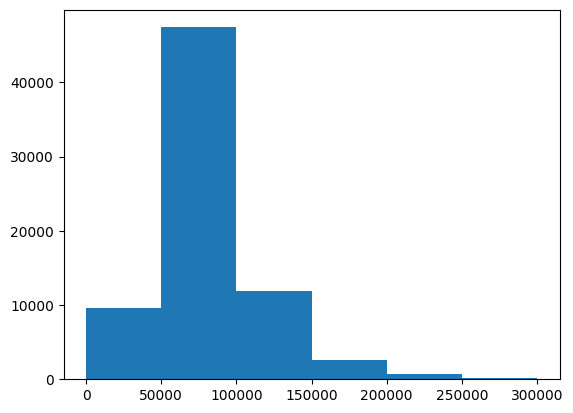

In [38]:
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000]
plt.hist(df['hhinc_mean2000'], bins=bins)
plt.show()

As a practical example, let's compare histograms of the distribution of income in some states. You can draw multiple charts in one figure by using <b>plt.subplot()</b>. The first and second arguments respectively specify the number of rows and columns of figures. The third argument specifies the position of the subplot starting from the upper left.

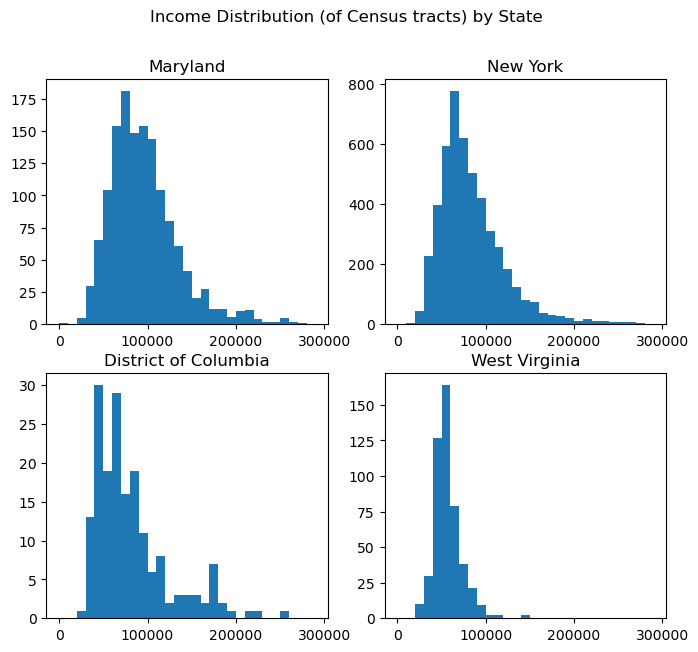

In [25]:
df_bystate = df[['state_name', 'hhinc_mean2000']].groupby('state_name').mean()

plt.figure(figsize =(8, 7)) 
bins = list(range(0,300000,10000))

plt.suptitle('Income Distribution (of Census tracts) by State') # Adding a title to the figure

plt.subplot(2,2,1)
plt.title('Maryland')
plt.hist(df.loc[df['state_name']=='Maryland', 'hhinc_mean2000'], bins=bins)

plt.subplot(2,2,2)
plt.title('New York')
plt.hist(df.loc[df['state_name']=='New York', 'hhinc_mean2000'], bins=bins)

plt.subplot(2,2,3)
plt.title('District of Columbia')
plt.hist(df.loc[df['state_name']=='District of Columbia', 'hhinc_mean2000'], bins=bins)

plt.subplot(2,2,4)
plt.title('West Virginia')
plt.hist(df.loc[df['state_name']=='West Virginia', 'hhinc_mean2000'], bins=bins)

plt.show()

You can create box plots too by using <b>plt.boxplot()</b>. Box plots are useful to get a sense of the central tendency, the variation, and the outlier of the data all at once. To understand how this works, let's first make the simplest example as follows.

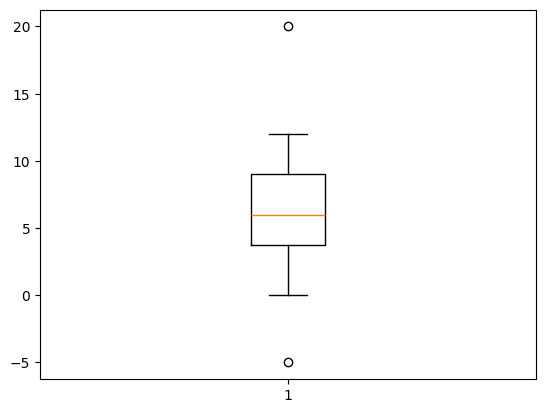

In [69]:
df_simple = [-5, 10, 2, 6, 9, 8, 12, 0, 5, 6, 4, 5, 8, 9, 3, 20]
plt.boxplot(df_simple)
plt.show()

The orange line represents the median. The box shows the range between the first and the third quantile (=IQR, inter-quantile range). The whiskers show the range between the first quantile - 1.5IQR and the third quantile + 1.5IQR. The white circles show the outliers whose values are out of the range (if exist).<br><br>
As a more practical example, let's create a box plot that shows the income distribution of some states.

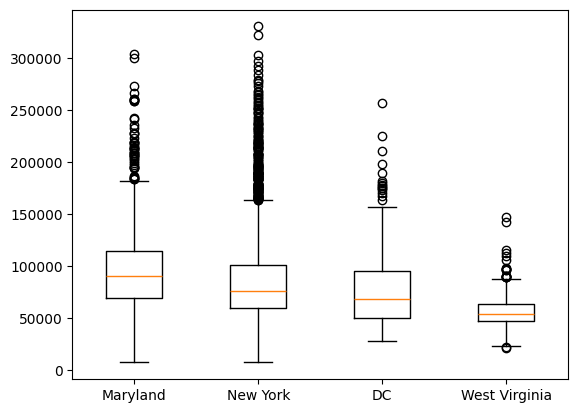

In [77]:
plt.boxplot([df.loc[df['state_name']=='Maryland', 'hhinc_mean2000'].dropna(),
             df.loc[df['state_name']=='New York', 'hhinc_mean2000'].dropna(),
             df.loc[df['state_name']=='District of Columbia', 'hhinc_mean2000'].dropna(),
             df.loc[df['state_name']=='West Virginia', 'hhinc_mean2000'].dropna()],
             labels=['Maryland', 'New York', 'DC', 'West Virginia'])
plt.show()

#### Seaborn
Seaborn is another option for a data visualization library available in Python, which includes Matplotlib within it (this relationship is referred to as Seaborn being a <i>wrapper</i> for Matplotlib).  Seaborn makes it easier to create beatiful graphical visualizations. Here  we give a brief introduction on how to use it.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Seaborn offers a default style that is slightly more sophisticated than that of Matplotlib. Let's take a look at it by creating a scatter plot as an example. First, we need to run <b>sns.set_theme()</b> to apply Seaborn's style to the chart. You can create a scatterplot with the function <b>sns.scatterplot()</b>. In Seaborn functions, you specify the dataframe you want to visualize by the <b>data</b> argument and the column names of the data by the <b>x</b> and <b>y</b> arguments. After creating a plot with <b>sns.scatterplot()</b>, you can use Matplotlib functions such as <b>plt.title()</b>, <b>plt.ylabel()</b>, etc. as you did with a normal matplotlib plot.

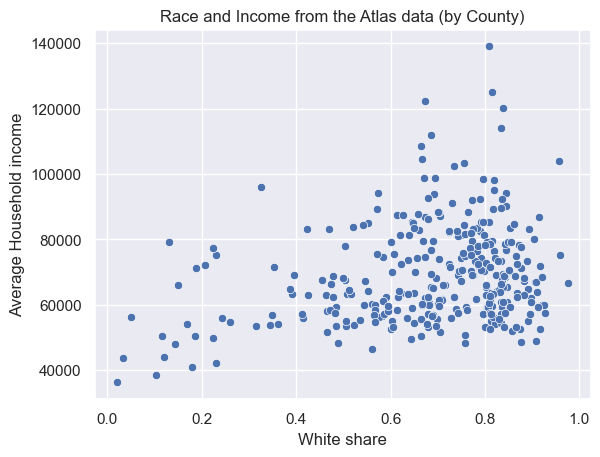

In [6]:
# Create data
df = pd.read_csv('atlas.csv')
df_bycounty = df[['county', 'share_white2000', 'hhinc_mean2000']].groupby('county').mean()

# Create chart
sns.set_theme()
sns.scatterplot(data=df_bycounty, x='share_white2000', y='hhinc_mean2000')
plt.title('Race and Income from the Atlas data (by County)')
plt.xlabel('White share')
plt.ylabel('Average Household income')
plt.show()

This is cool compared to Matplotlib scatter plots, right?<br><br>
As another example, let's also create a histogram with the <b>sns.histplot()</b> function. The argument specifications are the same as in the previous case of a scatter plot. That is, the <b>data</b> argument specifies the dataframe you want to use, and the <b>x</b> argument specifies the column name of the data.

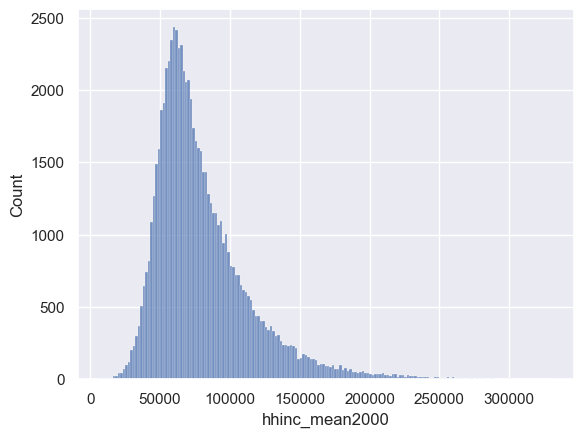

In [16]:
sns.set_theme()
sns.histplot(data=df, x='hhinc_mean2000')
plt.show()

Some types of graphs that are difficult to create in Matplotlib can be made very easily in Seaborn. A <i>heatmap</i> is an example of such graphs. A <i>heatmap</i> is a representation of values of two-dimensional data in shades of color. Here we represent the correlation coefficient matrix in the Atlas data with a heatmap.　You can simply pass the matrix to the <b>sns.heatmap()</b> function.

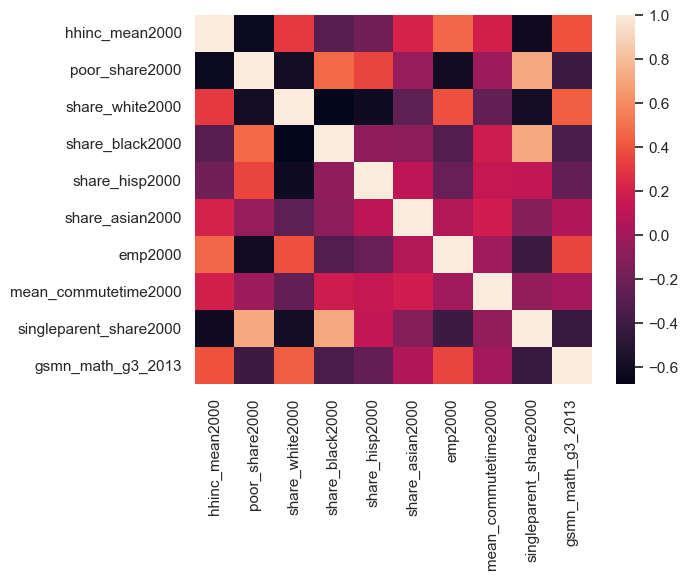

In [31]:
corrmatrix = df[['hhinc_mean2000', 'poor_share2000', 'share_white2000', 'share_black2000', 'share_hisp2000', 'share_asian2000', 'emp2000', 'mean_commutetime2000', 'singleparent_share2000', 'gsmn_math_g3_2013']].corr()
sns.heatmap(corrmatrix)
plt.show()

Let's make a few adjustments to the heatmap to make it easier to interpret. First, we focus on household income (hhinc_mean2000) and sort the other variables based on the correlation with it (The first three lines of the following code snippet). In addition, Seaborn's graph drawing function has an argument called <b>cmap</b>, which can be used to specify a color pattern. Here we use a pattern named <b>coolwarm</b>, which displays positive values in red and negative values in blue.

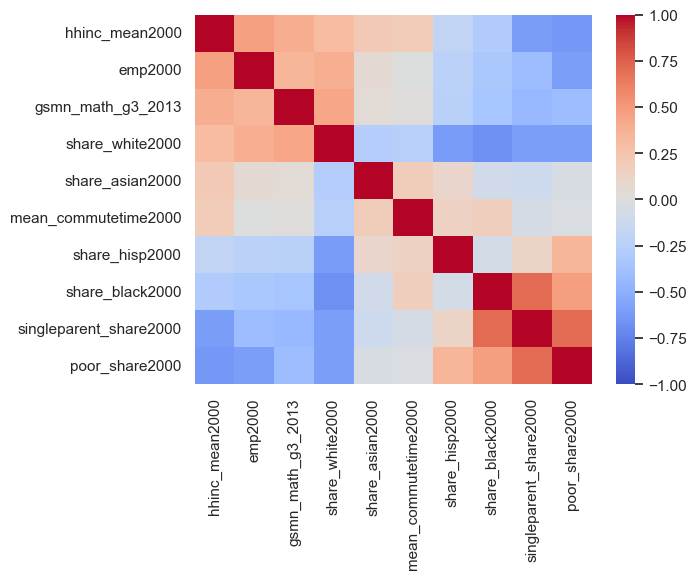

In [29]:
# Just sorting the data by the correlation with hhinc_mean2000
corrmatrix_tmp = df[['hhinc_mean2000', 'poor_share2000', 'share_white2000', 'share_black2000', 'share_hisp2000', 'share_asian2000', 'emp2000', 'mean_commutetime2000', 'singleparent_share2000', 'gsmn_math_g3_2013']].corr()
sorted_col = corrmatrix_tmp.loc['hhinc_mean2000'].sort_values(ascending=False).index
sorteddf = df[sorted_col] 

# Creating the heatmap
corrmatrix = sorteddf.corr()
sns.heatmap(corrmatrix, cmap='coolwarm', vmin=-1, vmax=1) # vmin and vmax specify the range of the value
plt.show()

### 5.3 Geographic Visualization
Visualizing data with maps is often useful in providing spatial insights. Such techniques are called <i>Geographic Visualization</i> (or <i>Geovisualization</i>). Let's try to visualize the Atlas data using a map. To do this in Python, the package <b>Geopandas</b> is useful. <br><br>
To use Geopandas, in addition to installing the package, you need to obtain something called a <i>shapefile</i>. For the U.S., you can get that on the Census website. Here we will try to use geopandas by obtaining the state map data (st99_d00_shp.zip) from the following URL.<br>
https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2000.html<br><br>
After reading geopandas and matplotlib, use the <b>geopandas.read_file()</b> function to read st99_d00.shp and store it in the states object. This object is called a <i>GeoDataFrame</i> and is, roughly speaking, a regular Pandas dataframe with geographic information added to it. GeoDataFrames allow you to use the methods of a regular dataframe. For example, the following code uses the <b>.query()</b> and <b>.head()</b> methods.


In [52]:
import matplotlib.pyplot as plt
import geopandas as gpd

states = gpd.read_file('st99_d00_shp/st99_d00.shp')
states = states.query("NAME not in ['Alaska', 'Hawaii', 'Puerto Rico']") # only focus on CONUS
states.head()

,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,LSAD_TRANS,geometry
81,25.539497,31.407183,83,82,27,Minnesota,01,2,4,None,"POLYGON ((-95.15332 49.19311, -95.15342 49.249..."
82,20.853578,30.717392,84,83,53,Washington,01,4,9,None,"POLYGON ((-122.29069 49.00243, -122.28565 49.0..."
83,0.001521,0.174360,85,84,53,Washington,01,4,9,None,"POLYGON ((-123.09055 49.00198, -123.06793 49.0..."
84,45.078463,34.976231,86,85,30,Montana,01,4,8,None,"POLYGON ((-116.04919 49.00091, -116.00103 49.0..."
85,24.456828,29.190335,87,86,16,Idaho,01,4,8,None,"POLYGON ((-116.04919 49.00091, -116.04918 48.8..."


By using the <b>.plot()</b> method on the GeoDataFrame, you can simply draw a map of the shapefile.

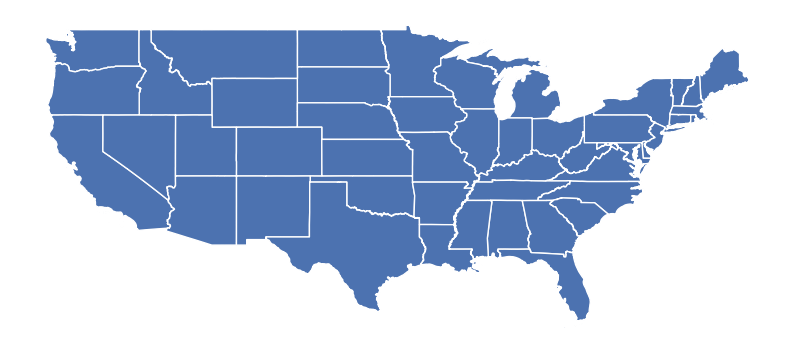

In [64]:
states.plot(figsize=(10, 8))
plt.axis('off') # To remove axis
plt.show()

Let's use color to represent the information in the state-by-state aggregate data on the map. First, we load the Atlas data and aggregate the data by state. Use the usual <b>pd.merge()</b> method to combine the GeoDataFrame and the Atlas dataframe using the state code as the key.

In [38]:
import pandas as pd
df = pd.read_csv('atlas.csv')
df_bystate = df[['state', 'hhinc_mean2000']].groupby('state').mean() # aggregate the income data into state level
df_bystate = df_bystate.reset_index()
states['STATE'] = states['STATE'].astype(int)
df_bystate = df_bystate.rename(columns = {'state':'STATE'}) # rename the column name so that 

gdf_combined = pd.merge(states, df_bystate, on='STATE', how='left')

You can use GeoDataFrame's <b>.plot()</b> method and specify a column name by the <b>column</b> argument to paint a map based on that data.

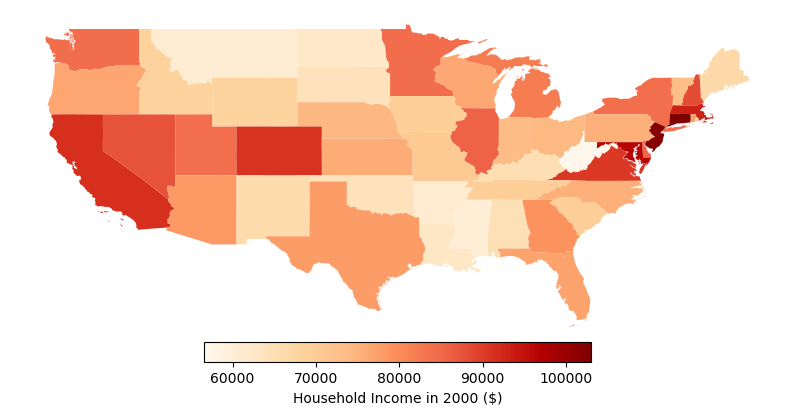

In [44]:
gdf_combined.plot(figsize=(10, 8),  cmap='OrRd', linewidth=0.1, column='hhinc_mean2000',legend=True, legend_kwds={"label": "Household Income in 2000 ($)", "orientation": "horizontal", "shrink": 0.5, "pad": 0},)
# legend and legend_kwds specify the option for the color bar
# cmap: color pattern
# linewidth: thickness of the boundary lines
plt.axis('off')
plt.show()

The results above show that incomes are higher in coastal areas compared to inland areas.
<br><br>
The Atras dataset contains more granular regional information. As another example, let's focus on Maryland and visualize the Census tract level information. Shape files of the Census tract level are available on the Census website (see the following URL).<br>
https://www.census.gov/cgi-bin/geo/shapefiles/index.php
<br><br>
For the Census tract level map of Maryland, let's first simply draw it as we did earlier.

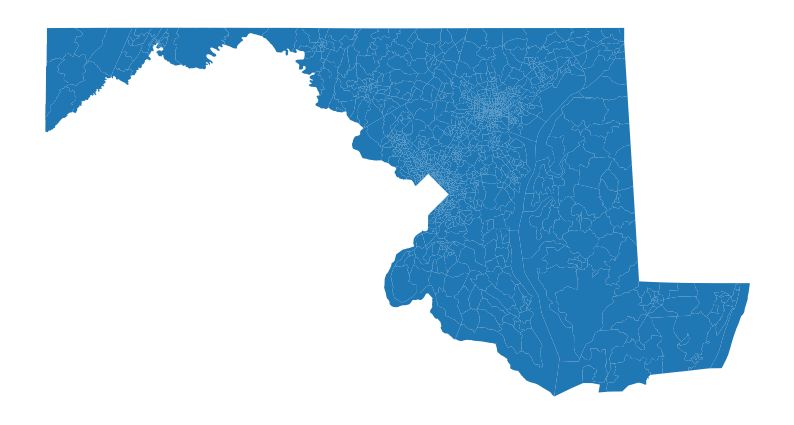

In [46]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

maryland = gpd.read_file('tl_2010_24_tract10/tl_2010_24_tract10.shp')
maryland.plot(figsize=(10, 8))
plt.axis('off') # To remove axis
plt.show()

The entire state of Maryland seems too large for this exercise, so we will focus only on the familiar Montgomery County and Prince George's County. As with regular data frames, we use the <b>.query()</b> method to select only these two counties. (In this data, the two counties are assigned codes 031 and 033, respectively.)

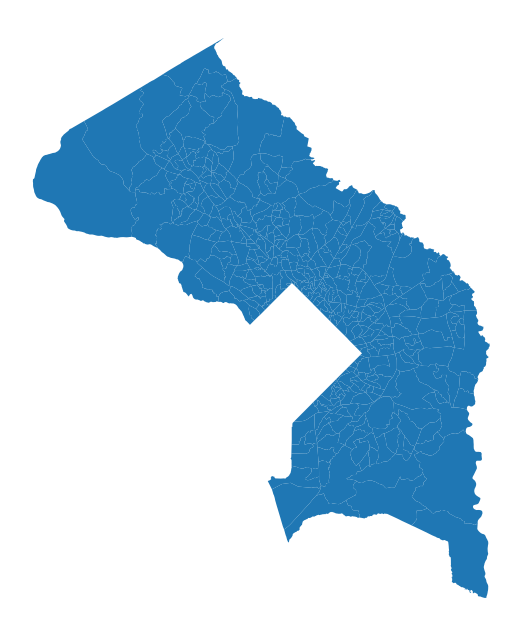

In [48]:
mg_pg = maryland.query("COUNTYFP10 in ['031', '033']")
mg_pg.plot(figsize=(10, 8))
plt.axis('off') # To remove axis
plt.show()

Let's plot household income information on this map. The procedure is the same as before: we use the <b>pd.merge()</b> function to merge the Atlas data with the map using the <b>tract</b> column as the key.

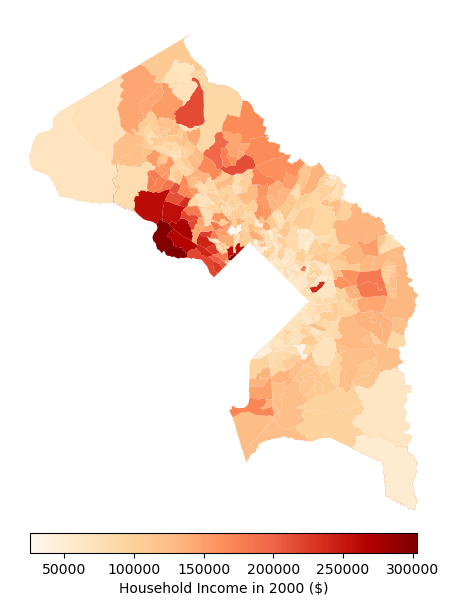

In [50]:
df = pd.read_csv('atlas.csv')
mg_pg = mg_pg.rename(columns = {'TRACTCE10':'tract'}) # rename the column name so that 
mg_pg['tract'] = mg_pg['tract'].astype(int)
mg_pg_combined = pd.merge(mg_pg, df[['tract', 'hhinc_mean2000']], on='tract', how='left')
mg_pg_combined.plot(figsize=(10, 8), cmap='OrRd', linewidth=0.1, column='hhinc_mean2000',legend=True, legend_kwds={"label": "Household Income in 2000 ($)", "orientation": "horizontal", "shrink": 0.5, "pad": 0},)
plt.axis('off')
plt.show()

We can see that many high income households reside in the area along the Potomac River in the western end of Montgomey County. On the other hand, College Park, where most students live, is home to many low-income households.